<a href="https://colab.research.google.com/github/data-aleks/type_one_ufo_analysis/blob/main/ufo_sightings_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Do Space Launches And Near Earth Asteroid Detction Influence UFO Sightings?**

This project performs a comprehensive data analysis to explore potential correlations between real-world UFO sightings and publicly available astronomical and space-related data. Our primary objective is to obtain, clean, process, and analyze reported UFO incidents to identify patterns, trends, and establish relationships with known public data sources.

- This project will focus on US sightings data labeled Tier 1 (The most dramatic sightings, strange structured craft or highly anomalous phenomena seen at close distance.)
- This project will use real life data obtained via public sources.
  Data Sources: [National UFO Reporting Center](https://nuforc.org/), [Our World In Data](https://ourworldindata.org/space-exploration)


Tools used in this project: **Pandas, Matplotlib, Scipy, Sklearn, Statsmodels**

Project structure:

1. Loading and Exploring Data
2. Cleaning Loaded Data
3. Exploring Data Using Visuals
4. Building Negative Binominal Model
5. Interpreting Results of Negative Binominal Model
6. Project Summary


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.discrete.discrete_model as smd
import requests

from sklearn.preprocessing import StandardScaler


## 1. **Loading and Exploring Data**

### **UFO Sighting Data**

Load our scraped ufo type 1 sighting data.

In [2]:
df = pd.read_csv('./drive/MyDrive/datasets/nuforc_type1_sighting_data.csv')

Check overall state of the data.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1388 entries, 0 to 1387
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   occurred  1387 non-null   object
 1   city      1324 non-null   object
 2   state     1330 non-null   object
 3   country   1388 non-null   object
 4   shape     1374 non-null   object
 5   summary   1388 non-null   object
dtypes: object(6)
memory usage: 65.2+ KB


In [4]:
df.head()

,occurred,city,state,country,shape,summary
0,05/19/2025 21:57,Johnstown,CO,USA,Orb,Bright white light seen overhead traveling ver...
1,05/17/2025 22:30,Oak Hill,FL,USA,Triangle,Huge triangle craft with escorts flew silently...
2,05/16/2025 23:00,Los Olivos,CA,USA,Unknown,I saw a huge glowing object I thought it had t...
3,05/11/2025 19:15,Minneapolis,MN,USA,Changing,"An hour before sunset, a black and silver (ref..."
4,05/07/2025 23:20,North Richland Hills,TX,USA,Triangle,Large black triangle shaped object the size of...


### **US Space Launch Data**

Loading our space launch data

In [5]:
# Fetch the data.
df_space_launches = pd.read_csv("https://ourworldindata.org/grapher/cumulative-number-of-objects-launched-into-outer-space.csv?v=1&csvType=filtered&useColumnShortNames=true&time=earliest..2024&country=~USA", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})

# Fetch the metadata
metadata = requests.get("https://ourworldindata.org/grapher/cumulative-number-of-objects-launched-into-outer-space.metadata.json?v=1&csvType=filtered&useColumnShortNames=true&time=earliest..2024&country=~USA").json()

df_space_launches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Entity               67 non-null     object
 1   Code                 67 non-null     object
 2   Year                 67 non-null     int64 
 3   cumulative_launches  67 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ KB


In [6]:
df_space_launches.head()

,Entity,Code,Year,cumulative_launches
0,United States,USA,1958,7
1,United States,USA,1959,18
2,United States,USA,1960,35
3,United States,USA,1961,66
4,United States,USA,1962,121


### **Near Earth Asteroids Data**

Loading data for near earth asteroids

In [7]:
# Fetch the data.
df_asteroids = pd.read_csv("https://ourworldindata.org/grapher/near-earth-asteroids-discovered-over-time.csv?v=1&csvType=filtered&useColumnShortNames=true&time=earliest..latest", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})

# Fetch the metadata
metadata = requests.get("https://ourworldindata.org/grapher/near-earth-asteroids-discovered-over-time.metadata.json?v=1&csvType=filtered&useColumnShortNames=true&time=earliest..latest").json()


In [8]:
df_asteroids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Entity                  35 non-null     object
 1   Code                    35 non-null     object
 2   Year                    35 non-null     int64 
 3   smaller_than_140m       35 non-null     int64 
 4   between_140m_and_1km    35 non-null     int64 
 5   larger_than_1km         35 non-null     int64 
 6   smaller_than_140m.1     35 non-null     int64 
 7   between_140m_and_1km.1  35 non-null     int64 
 8   larger_than_1km.1       35 non-null     int64 
dtypes: int64(7), object(2)
memory usage: 2.6+ KB


In [9]:
df_asteroids.head()

,Entity,Code,Year,smaller_than_140m,between_140m_and_1km,larger_than_1km,smaller_than_140m.1,between_140m_and_1km.1,larger_than_1km.1
0,World,OWID_WRL,1900,0,0,1,0,0,1
1,World,OWID_WRL,1910,0,0,1,0,0,1
2,World,OWID_WRL,1920,0,0,3,0,0,3
3,World,OWID_WRL,1930,0,0,5,0,0,5
4,World,OWID_WRL,1940,0,1,8,0,1,8


## 2. **Cleaning Loaded Data**

### **Cleaning UFO Sighting data**

In this step we clean our data we our analysis will be focused on the number of US sightings as this is where most of the sightings are recorded. We will remove any unnecessary information from our dataframe.

Check what column names look like.

In [10]:
df.columns

Index(['occurred', 'city', 'state', 'country', 'shape', 'summary'], dtype='object')

Rename occured column to date.

In [11]:
df.rename(columns={
    'occurred': 'date',
}, inplace=True)

Filter dataset by country as we will be using data for US as the majority of sightings are recored in US

In [12]:
df = df[df["country"] == "USA"]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1140 entries, 0 to 1386
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     1140 non-null   object
 1   city     1110 non-null   object
 2   state    1140 non-null   object
 3   country  1140 non-null   object
 4   shape    1131 non-null   object
 5   summary  1140 non-null   object
dtypes: object(6)
memory usage: 62.3+ KB


In [14]:
df.head()

,date,city,state,country,shape,summary
0,05/19/2025 21:57,Johnstown,CO,USA,Orb,Bright white light seen overhead traveling ver...
1,05/17/2025 22:30,Oak Hill,FL,USA,Triangle,Huge triangle craft with escorts flew silently...
2,05/16/2025 23:00,Los Olivos,CA,USA,Unknown,I saw a huge glowing object I thought it had t...
3,05/11/2025 19:15,Minneapolis,MN,USA,Changing,"An hour before sunset, a black and silver (ref..."
4,05/07/2025 23:20,North Richland Hills,TX,USA,Triangle,Large black triangle shaped object the size of...


We will be primarily focusing on number of sightings as opposed to carrying out analysis of locations etc. So we do not require city, shape, comment columns.

In [15]:
df = df.drop(['city', 'state', 'shape', 'summary', 'country'], axis=1)

Check the dataset for null values.

In [16]:
df.isnull().sum()

,0
date,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1140 entries, 0 to 1386
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1140 non-null   object
dtypes: object(1)
memory usage: 17.8+ KB


In [18]:
df.head()

,date
0,05/19/2025 21:57
1,05/17/2025 22:30
2,05/16/2025 23:00
3,05/11/2025 19:15
4,05/07/2025 23:20


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1140 entries, 0 to 1386
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1140 non-null   object
dtypes: object(1)
memory usage: 17.8+ KB


Change date to datetime type. This will identify any records that have date miskeyed or missing.

In [20]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1140 entries, 0 to 1386
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1139 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 17.8 KB


Remove record with missing date after date conversion.

In [22]:
df[df['date'].isnull()]

,date
1386,NaT


In [23]:
df.dropna(subset=['date'], inplace=True)

We will aggregate the dataset based on year.

In [24]:
# Create a 'year' column
df['year'] = df['date'].dt.year

# Group by year and count sightings
df = (
    df.groupby('year')
    .size()
    .reset_index(name='sightings')
)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   year       74 non-null     int32
 1   sightings  74 non-null     int64
dtypes: int32(1), int64(1)
memory usage: 1020.0 bytes


In [26]:
df.head()

,year,sightings
0,1936,1
1,1947,2
2,1950,1
3,1953,1
4,1954,1


In [27]:
df.tail()

,year,sightings
69,2021,60
70,2022,76
71,2023,270
72,2024,155
73,2025,61


### **Cleaning US Space Launch Data**

In this step we will explore and clean our US Space Launch Data.

In [28]:
df_space_launches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Entity               67 non-null     object
 1   Code                 67 non-null     object
 2   Year                 67 non-null     int64 
 3   cumulative_launches  67 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ KB


We do not need either Entity or Code as we are focused on counting the amount of space launches.

In [29]:
df_space_launches = df_space_launches.drop(['Entity', 'Code'], axis=1)

Let's rename our columns for better readability.

In [30]:
df_space_launches.rename(columns={'Year': 'year', 'cumulative_launches': 'launches'}, inplace=True)

In [31]:
df_space_launches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   year      67 non-null     int64
 1   launches  67 non-null     int64
dtypes: int64(2)
memory usage: 1.2 KB


### **Cleaning Near Earth Asteroid Data**

In this step we explore and clean Near Earth Asteroid Detection data.

In [32]:
df_asteroids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Entity                  35 non-null     object
 1   Code                    35 non-null     object
 2   Year                    35 non-null     int64 
 3   smaller_than_140m       35 non-null     int64 
 4   between_140m_and_1km    35 non-null     int64 
 5   larger_than_1km         35 non-null     int64 
 6   smaller_than_140m.1     35 non-null     int64 
 7   between_140m_and_1km.1  35 non-null     int64 
 8   larger_than_1km.1       35 non-null     int64 
dtypes: int64(7), object(2)
memory usage: 2.6+ KB


Our dataset comes with a number of columns dedicated to different sizes of asteroids detected. We are purely interested in the number of Near Earth asteroids detected. We will create a column which has a sum of all sizes of asteroids detected.

In [33]:
# Create cumulative_asteroids column by summing relevant size columns
df_asteroids["asteroids"] = df_asteroids[
    [
        "smaller_than_140m",
        "between_140m_and_1km",
        "larger_than_1km",
    ]
].sum(axis=1)

In [34]:
df_asteroids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Entity                  35 non-null     object
 1   Code                    35 non-null     object
 2   Year                    35 non-null     int64 
 3   smaller_than_140m       35 non-null     int64 
 4   between_140m_and_1km    35 non-null     int64 
 5   larger_than_1km         35 non-null     int64 
 6   smaller_than_140m.1     35 non-null     int64 
 7   between_140m_and_1km.1  35 non-null     int64 
 8   larger_than_1km.1       35 non-null     int64 
 9   asteroids               35 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.9+ KB


We will remove columns that are not needed.

In [35]:
df_asteroids = df_asteroids.drop(['Entity', 'Code', 'smaller_than_140m', 'between_140m_and_1km', 'larger_than_1km', 'smaller_than_140m.1', 'between_140m_and_1km.1', 'larger_than_1km.1'], axis=1)

Make remaining columns lower case.

In [36]:
df_asteroids.columns = df_asteroids.columns.str.lower()

In [37]:
df_asteroids.tail(15)

,year,asteroids
20,2010,7524
21,2011,8455
22,2012,9417
23,2013,10465
24,2014,11950
25,2015,13444
26,2016,15457
27,2017,17452
28,2018,19346
29,2019,21760


We have an issue where historical data for asteroid sightings prior to year 2000 is recorded every 10 years. In order for us not to loose this data we use linear interpolation to fill the missing values.

In [38]:
df_asteroids = df_asteroids.set_index('year').sort_index()
full_years = range(df_asteroids.index.min(), df_asteroids.index.max() + 1)
df_asteroids = df_asteroids.reindex(full_years)
df_asteroids['asteroids'] = df_asteroids['asteroids'].interpolate(method='linear').round().astype(int)

In [39]:
df_asteroids.tail()

,asteroids
year,
2020,24663
2021,27897
2022,31057
2023,33895
2024,36857


### **Combinig the Data in to a Single Dataframe**

In this step we will create a combined dataset which will contained all of our data from UFO sightings, launches and asteroids. We do this by merging in to our main dataset on year.

In [40]:
# Start with main sightings dataframe
df_combined = df.merge(df_space_launches, on='year', how='left') \
                .merge(df_asteroids, on='year', how='left') \

df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       74 non-null     int32  
 1   sightings  74 non-null     int64  
 2   launches   65 non-null     float64
 3   asteroids  73 non-null     float64
dtypes: float64(2), int32(1), int64(1)
memory usage: 2.2 KB


We can see that some of our launches data is missing. This is most likely due to sightings and asteroids being recorded much earlier then the human space exploration began ( 1960s ).

In [41]:
df_combined.tail(10)

,year,sightings,launches,asteroids
64,2016,22,2479.0,15457.0
65,2017,20,2765.0,17452.0
66,2018,16,2955.0,19346.0
67,2019,11,3317.0,21760.0
68,2020,15,4301.0,24663.0
69,2021,60,5533.0,27897.0
70,2022,76,7472.0,31057.0
71,2023,270,9706.0,33895.0
72,2024,155,11969.0,36857.0
73,2025,61,NaN,NaN


We will drop records that are missing launch data.

In [42]:
df_combined.dropna(subset={'launches'}, inplace=True)

In [43]:
df_combined[['launches', 'asteroids']] = df_combined[['launches', 'asteroids']].astype(int)

In [44]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65 entries, 8 to 72
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   year       65 non-null     int32
 1   sightings  65 non-null     int64
 2   launches   65 non-null     int64
 3   asteroids  65 non-null     int64
dtypes: int32(1), int64(3)
memory usage: 2.3 KB


As we can see we have an inconsistency where near earth asteroid data we have prior to year 2000 is recorded every 10 years.

## 3. **Exploring Data Using Visuals**

In this step we will visualise our key data points, to give us an idea of how our data looks.

### **UFO Sightings Over Time**

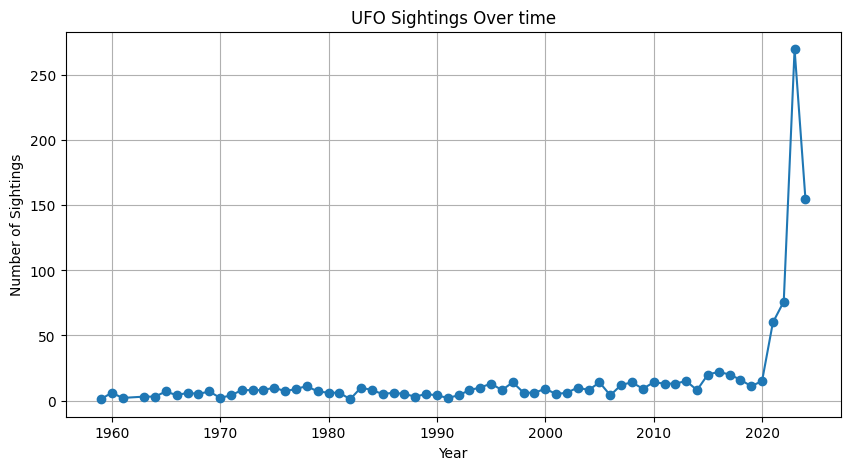

In [45]:
# Plotting the sightings
plt.figure(figsize=(10,5))
plt.plot(df_combined['year'], df_combined['sightings'], marker='o')
plt.xlabel("Year")
plt.ylabel("Number of Sightings")
plt.title("UFO Sightings Over time")
plt.grid()
plt.show()

### **Space Launches Over Time**

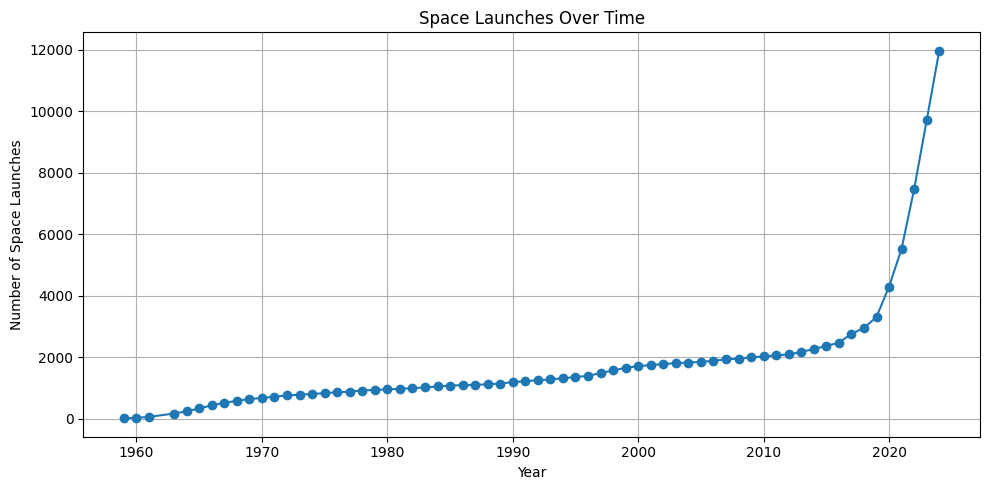

In [46]:
# Plotting directly from the 'year' and 'launches' columns
plt.figure(figsize=(10, 5))
plt.plot(df_combined['year'], df_combined['launches'], marker='o')
plt.xlabel("Year")
plt.ylabel("Number of Space Launches")
plt.title("Space Launches Over Time")
plt.grid()
plt.tight_layout()
plt.show()


### **Near Earth Asteroids Over Time**

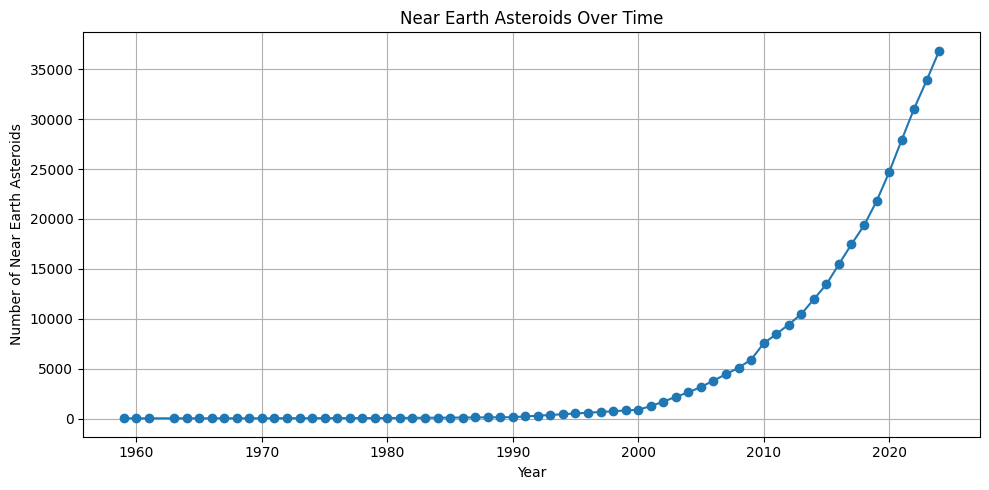

In [47]:
# Plotting directly from the 'year' and 'asteroids' columns
plt.figure(figsize=(10, 5))
plt.plot(df_combined['year'], df_combined['asteroids'], marker='o')
plt.xlabel("Year")
plt.ylabel("Number of Near Earth Asteroids")
plt.title("Near Earth Asteroids Over Time")
plt.grid()
plt.tight_layout()
plt.show()

## 4. **Building Negative Binomial Model**

Why we are using **Negative Binominal Model**?
After doing research and I have established that Negative Binominal Model is best suited for count data which exhibits overdispersion ( when varience is greater than mean ).


In [48]:
X = df_combined[["asteroids", "launches"]]
X = sm.add_constant(X)
y = df_combined['sightings']

nb_model = smd.NegativeBinomial(y, sm.add_constant(X))
nb_results = nb_model.fit()

print(nb_results.summary())

Optimization terminated successfully.
         Current function value: 2.784404
         Iterations: 30
         Function evaluations: 55
         Gradient evaluations: 45
                     NegativeBinomial Regression Results                      
Dep. Variable:              sightings   No. Observations:                   65
Model:               NegativeBinomial   Df Residuals:                       62
Method:                           MLE   Df Model:                            2
Date:                Mon, 16 Jun 2025   Pseudo R-squ.:                  0.2713
Time:                        09:24:26   Log-Likelihood:                -180.99
converged:                       True   LL-Null:                       -248.38
Covariance Type:            nonrobust   LLR p-value:                 5.368e-30
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6112      0.081     1

/usr/local/lib/python3.11/dist-packages/statsmodels/discrete/discrete_model.py:3663: RuntimeWarning: overflow encountered in exp
  return np.exp(linpred)
/usr/local/lib/python3.11/dist-packages/statsmodels/discrete/discrete_model.py:3379: RuntimeWarning: divide by zero encountered in log
  llf = coeff + size*np.log(prob) + endog*np.log(1-prob)
/usr/local/lib/python3.11/dist-packages/statsmodels/discrete/discrete_model.py:3470: RuntimeWarning: invalid value encountered in divide
  dparams = exog*a1 * (y-mu)/(mu+a1)
/usr/local/lib/python3.11/dist-packages/statsmodels/discrete/discrete_model.py:3473: RuntimeWarning: invalid value encountered in divide
  - np.log(a1+mu) - (y-mu)/(a1+mu)).sum() * da1
/usr/local/lib/python3.11/dist-packages/statsmodels/discrete/discrete_model.py:3663: RuntimeWarning: overflow encountered in exp
  return np.exp(linpred)
/usr/local/lib/python3.11/dist-packages/statsmodels/discrete/discrete_model.py:3379: RuntimeWarning: divide by zero encountered in log
  llf 

As we can see while the model succesfully executed there is still quite a few errors displayed. This is most likely due to the fact that our data ranges from very small values to the very large. Let's confirm that.

In [49]:
df_combined['sightings'].describe()

,sightings
count,65.000000
mean,16.415385
std,38.393071
min,1.000000
25%,5.000000
50%,8.000000
75%,13.000000
max,270.000000


In [50]:
df_combined['launches'].describe()

,launches
count,65.000000
mean,1810.230769
std,2032.057115
min,18.000000
25%,864.000000
50%,1254.000000
75%,1959.000000
max,11969.000000


In [51]:
df_combined['asteroids'].describe()

,asteroids
count,65.000000
mean,5028.030769
std,9168.982734
min,19.000000
25%,41.000000
50%,283.000000
75%,5091.000000
max,36857.000000


We can assume that large magnitudes and wide ranges in launches and asteroids are whats causing our numerical stability warnings. The best approach would be to standartize our launches and asteroids values. We can utilise StandardScaler from sklearn.

In [52]:
df_scaled = df_combined.copy()
scaler = StandardScaler()
df_scaled[['launches_scaled', 'asteroids_scaled']] = scaler.fit_transform(df_scaled[['launches', 'asteroids']])
X_scaled = df_scaled[['launches_scaled', 'asteroids_scaled']]
X_scaled = sm.add_constant(X_scaled, prepend=True) # Prepends the constant column
y = df_scaled['sightings']


Rerun our model using scaled values.

In [53]:
neg_binom_model_scaled = sm.NegativeBinomial(y, X_scaled)
neg_binom_results_scaled = neg_binom_model_scaled.fit()

Optimization terminated successfully.
         Current function value: 2.784404
         Iterations: 12
         Function evaluations: 15
         Gradient evaluations: 15


In [54]:
print(neg_binom_results_scaled.summary())

                     NegativeBinomial Regression Results                      
Dep. Variable:              sightings   No. Observations:                   65
Model:               NegativeBinomial   Df Residuals:                       62
Method:                           MLE   Df Model:                            2
Date:                Mon, 16 Jun 2025   Pseudo R-squ.:                  0.2713
Time:                        09:24:26   Log-Likelihood:                -180.99
converged:                       True   LL-Null:                       -248.38
Covariance Type:            nonrobust   LLR p-value:                 5.368e-30
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.2247      0.058     38.501      0.000       2.111       2.338
launches_scaled      0.5233      0.119      4.380      0.000       0.289       0.757
asteroids_scaled     0.2600 

As we can see our warnings have dissapeared.

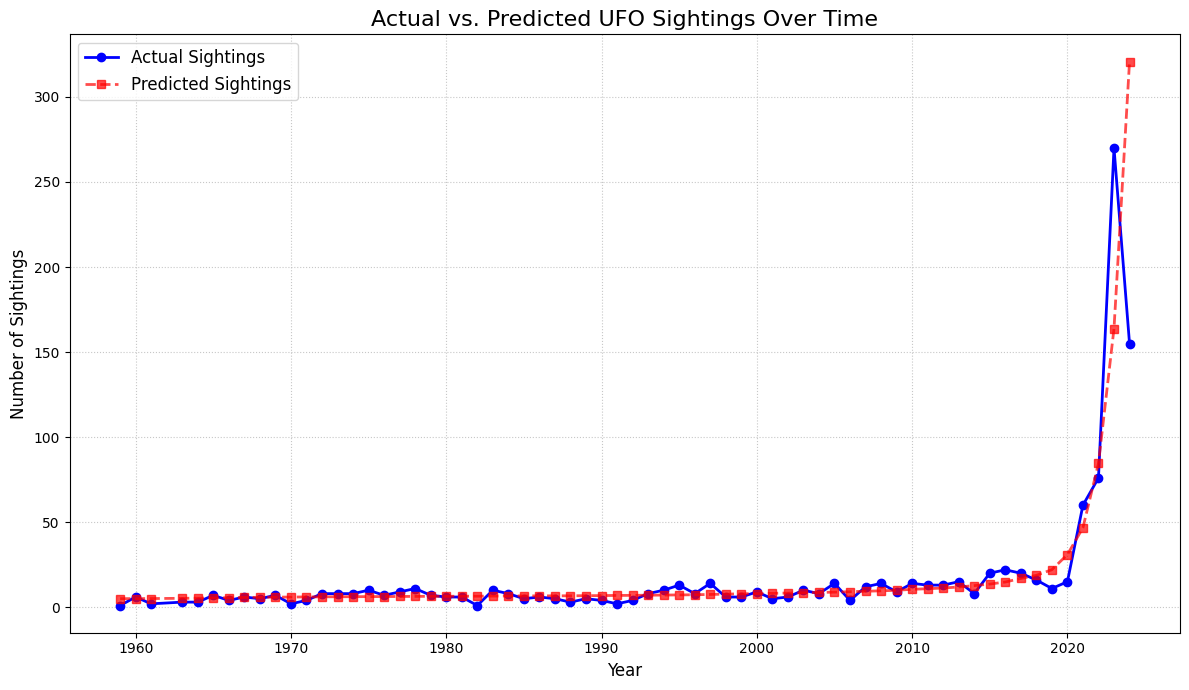

In [55]:
y_pred = neg_binom_results_scaled.predict(X_scaled)

df_plot = df_combined.copy()
df_plot['predicted_sightings'] = y_pred # Add predictions to the DataFrame
df_plot = df_plot.sort_values(by='year') # Sort by year

plt.figure(figsize=(12, 7)) # Slightly larger for better readability

# Plot actual vs. predicted sightings over time
plt.plot(df_plot['year'], df_plot["sightings"],
         label="Actual Sightings",
         marker='o', linestyle='-', color='blue', linewidth=2)
plt.plot(df_plot['year'], df_plot["predicted_sightings"],
         label="Predicted Sightings",
         linestyle='--', marker='s', color='red', alpha=0.7, linewidth=2)

plt.title("Actual vs. Predicted UFO Sightings Over Time", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Sightings", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle=':', alpha=0.7)
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

## 5. **Interpreting the Results of Negative Binominal Model**

### **Model explanation in context of our project**

In [56]:
print(neg_binom_results_scaled.summary())

                     NegativeBinomial Regression Results                      
Dep. Variable:              sightings   No. Observations:                   65
Model:               NegativeBinomial   Df Residuals:                       62
Method:                           MLE   Df Model:                            2
Date:                Mon, 16 Jun 2025   Pseudo R-squ.:                  0.2713
Time:                        09:24:27   Log-Likelihood:                -180.99
converged:                       True   LL-Null:                       -248.38
Covariance Type:            nonrobust   LLR p-value:                 5.368e-30
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.2247      0.058     38.501      0.000       2.111       2.338
launches_scaled      0.5233      0.119      4.380      0.000       0.289       0.757
asteroids_scaled     0.2600 

My analysis utilized a **Negative Binomial Regression** model to investigate the factors influencing "Tier 1" US UFO sightings, which are defined as the most dramatic observations of strange structured craft or highly anomalous phenomena seen at close distance, as recorded by [Nuforc.org](https://nuforc.org/). With 65 data points (years of observations), the model achieved a **Pseudo R-squared of 0.2713**, indicating it explains approximately **27.13%** of the variability in these sightings. A highly significant LLR p-value of **5.368e
−30** confirms that the relationships identified by the model are statistically robust and not due to random chance, further supported by the significant alpha parameter which validates the choice of a Negative Binomial model due to overdispersion in the sighting data. I found that the **count of space launches** is a **very strong and statistically significant** predictor: its **coefficient of 0.5233** implies that **for every one-unit increase in space launches, the expected number of "Tier 1" UFO sightings increases by a substantial 68.7%.** Similarly, the count of detected near-Earth asteroids (asteroids_scaled) also shows a statistically significant, albeit less pronounced, positive correlation; its coefficient of 0.2600 suggests that for **every one-unit increase in asteroid detections, "Tier 1" UFO sightings are expected to rise by 29.7%.** This suggests that while simple misidentification of space objects as "Tier 1" craft is less likely given their definition, the increasing frequency of **human space activity** and **public awareness** of celestial events are **significantly associated** with a rise in reports of the most dramatic and anomalous UFO phenomena

## 6. **Project Summary**

This project investigated the relationship between human space activity, astronomical observations, and reported Unidentified Flying Object (UFO) sightings. I analyzed **65 years of US Tier 1 UFO** sighting data from [NUFORC](https://nuforc.org/), which specifically focuses on the most dramatic reports of "strange structured craft or highly anomalous phenomena seen at close distance." This was correlated with astronomical data on space launches and near-Earth asteroid detections sourced from [Our World In Data](https://ourworldindata.org/). **My primary objective was to establish whether these two factors significantly impact Tier 1 UFO sighting data.**

The model revealed a **strong positive relationship** between the number of **US space launches** and **Tier 1 UFO US sightings**. Specifically, the analysis showed that **each space launch is associated with an approximate 68.7% increase in the expected number of sightings.** Similarly, near-Earth asteroid detections also demonstrated a significant positive relationship, with **each new asteroid detected correlating to an approximate 29.7% increase in sightings.**

Based on model's findings, I can conclude that the increase in human space activity, particularly the sharp rise in launches and near-Earth asteroid detections observed post-2010 (a period characterized by increased privatization of space exploration and advancements in detection technologies), positively contributes to the number of reported sightings. I propose that the **heightened public coverage** and **awareness surrounding human space activity** and **astronomical events** increases the likelihood of individuals observing, interpreting, and consequently reporting unusual aerial phenomena as "Tier 1" UFOs.